<a href="https://colab.research.google.com/github/ealeongomez/Deep-Learning/blob/master/CNN_LeNet5-TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**LeNet-5**

LeNet 5 es una estructura de Red Neuronal Convolucional compuesta por 7 capas y distribuida por 3 capas convolucionales, 2 capas de submuestreo y 2 capas densas.

1. Capas convolucionales 
2. Capas de agrupamiento

Articulo: http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf
Nota: las imagenes de entrada deben poseer dimensiones de 32x32


In [ ]:
# Librerias principales
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Reducción de dimensiones 
from sklearn.decomposition import PCA

# Métricas de rendimiento
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

# Deep Learning
import tensorflow as tf
from tensorflow import keras


In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

X_train = np.pad(X_train, ((0,0),(2,2),(2,2)), 'constant')
X_valid = np.pad(X_valid, ((0,0),(2,2),(2,2)), 'constant')
X_test = np.pad(X_test, ((0,0),(2,2),(2,2)), 'constant')

print('Training samples: ', X_train.shape)
print('Test samples: ', X_test.shape)
print('Validation samples: ', X_valid.shape)

11493376/11490434 [==============================] - 0s 0us/step
Training samples:  (55000, 32, 32)
Test samples:  (10000, 32, 32)
Validation samples:  (5000, 32, 32)


In [ ]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]

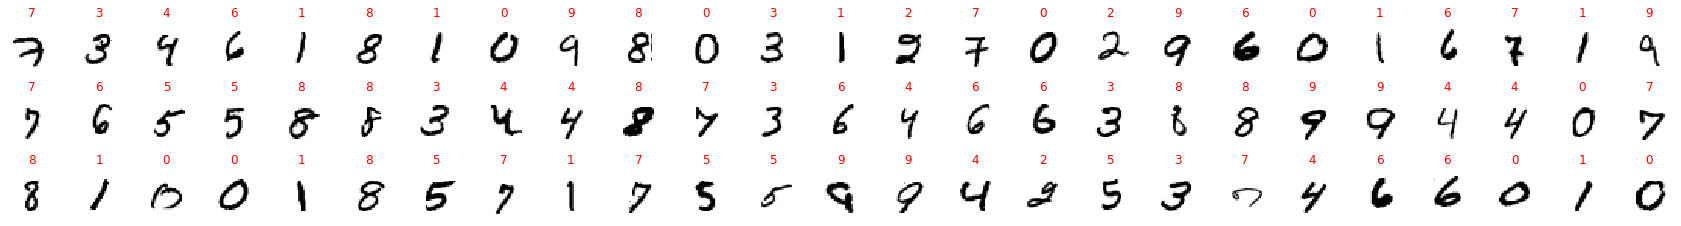

In [ ]:
n_rows = 3
n_cols = 25
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows): 
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12, c='r')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show() 

In [ ]:
input = tf.keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2], 1), name='Input')   

# Estructura de extracción de características
c1 = keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=X_train[0].shape, padding='same')(input)
s1 = keras.layers.AveragePooling2D()(c1)
c2 = keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid')(s1)
s2 = keras.layers.AveragePooling2D()(c2)

# Estructura densa de la Red
flatten = tf.keras.layers.Flatten(input_shape=(X_train.shape[1], X_train.shape[2]))(s2)    
h1 = tf.keras.layers.Dense(120, activation='tanh', name='h1')(flatten)
h2 = tf.keras.layers.Dense(84, activation='tanh', name='h2')(h1)

# Capa de salida 
output = tf.keras.layers.Dense(10,activation="softmax",name='outAMC')(h2)                 

model = tf.keras.Model(inputs=input, outputs=output)
model.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
h1 (Dense)                   (None, 120)              

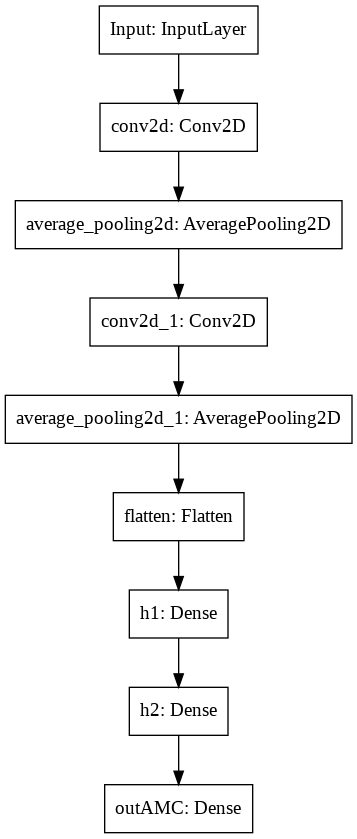

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',  # Función de costo a derivar
              optimizer=tf.optimizers.SGD(lr=0.001),   # Optimización: gradiente descendente     
              metrics=['accuracy']                     # Monitoriar la medida de desempeño (no lo deriva-> solo para ver la tarea final)   
              ) 

history = model.fit(X_train,                             # Conjunto de entrenamiento
                   y_train,                             # Etiquetas 
                   epochs=30,                            # Epocas: número de veces que se ejecutaran el algoritmo de backpropagation 
                   validation_data=(X_valid, y_valid))  # Conjunto de validación (evaluar el desempeño)

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 1.7752 - accuracy: 0.5653 - val_loss: 1.1500 - val_accuracy: 0.7730
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.8538 - accuracy: 0.8171 - val_loss: 0.6483 - val_accuracy: 0.8510
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5832 - accuracy: 0.8593 - val_loss: 0.4995 - val_accuracy: 0.8754
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4804 - accuracy: 0.8774 - val_loss: 0.4248 - val_accuracy: 0.8910
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4233 - accuracy: 0.8888 - val_loss: 0.3798 - val_accuracy: 0.8986
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3860 - accuracy: 0.8951 - val_loss: 0.3481 - val_accuracy: 0.9054
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3592 - accuracy: 0.9012 - val_loss: 0.3250 - val_accuracy:

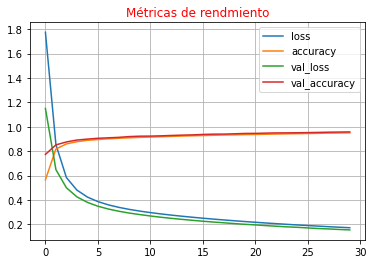

In [ ]:
hpd = pd.DataFrame(history.history)

hpd.plot()
plt.title('Métricas de rendmiento', c='r')
plt.grid(True)
plt.show()

In [ ]:
model_PCA = tf.keras.Model(inputs=input, outputs=model.get_layer('h2').output)
tf.keras.utils.plot_model(model_PCA)
ReductionDimension_PCA = model_PCA.predict(X_train)

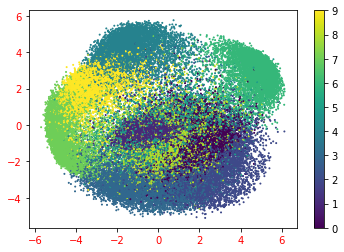

In [ ]:
pca = PCA(n_components = 2)

tranformed_pca = pca.fit_transform(ReductionDimension_PCA)

plt.figure()
plt.scatter(tranformed_pca[:,0], tranformed_pca[:,1], s=1, c=y_train)
plt.colorbar()
plt.xticks(c='r')
plt.yticks(c='r')
plt.show()

In [ ]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_train.shape

(55000,)

In [ ]:
pred_ = np.round(model.predict(X_test))
pred_NN = np.array([x.argmax() for x in pred_])

In [ ]:
print("Accuracy :", accuracy_score(y_test, pred_NN))
print(confusion_matrix(list(y_test), list(pred_NN)))
print(classification_report(y_test, pred_NN, target_names=class_names))

Accuracy : 0.9419
[[ 972    0    0    1    0    1    4    1    1    0]
 [   6 1112    4    2    0    1    2    0    8    0]
 [  41    0  954    9    3    0    4    7   13    1]
 [  30    1    7  944    0   11    0    8    8    1]
 [  25    0    5    1  916    0    5    1    1   28]
 [  35    1    0   23    0  815    8    1    6    3]
 [  15    3    2    1    3    5  927    0    2    0]
 [  25    3   19    5    2    0    0  960    0   14]
 [  44    0    3    8    3    7    5    7  894    3]
 [  33    6    0    8   20    4    0    9    4  925]]
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       980
           1       0.99      0.98      0.98      1135
           2       0.96      0.92      0.94      1032
           3       0.94      0.93      0.94      1010
           4       0.97      0.93      0.95       982
           5       0.97      0.91      0.94       892
           6       0.97      0.97      0.97       958
           7      